In [0]:
!pip install -q tensorflow==2.0.0-beta1



     |████████████████████████████████| 87.9MB 1.3MB/s 
     |████████████████████████████████| 3.1MB 36.9MB/s 
     |████████████████████████████████| 501kB 51.9MB/s 


In [0]:
from google.colab import files
uploaded = files.upload()

Saving summer.csv to summer.csv


In [0]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as plot
import io


In [0]:
summer_data=pd.read_csv(io.BytesIO(uploaded['summer.csv']))

In [0]:
summer_data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [0]:
summer_data['Country'].describe()

count     31161
unique      147
top         USA
freq       4585
Name: Country, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f410ce013c8>]],
      dtype=object)

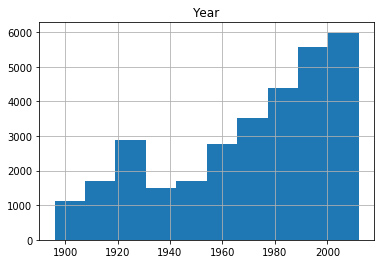

In [0]:
summer_data.hist()

In [0]:
summer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [0]:
pd.set_option('display.max_rows', 500)

summer_data['Country'].value_counts()

USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
FRG     490
FIN     456
ESP     442
YUG     435
BRA     431
BEL     411
CUB     410
SUI     380
BUL     333
TCH     329
EUA     260
ARG     259
EUN     223
NZL     190
IND     184
UKR     173
GRE     148
AUT     146
JAM     127
PAK     121
CRO     114
BLR     113
RSA     106
MEX     106
KEN      93
TUR      86
NGR      84
URU      76
IRI      61
PRK      58
CZE      56
LTU      55
KAZ      49
ZZX      48
ETH      45
TPE      44
EST      39
INA      38
SVK      34
POR      33
CHI      33
SRB      31
IRL      30
ANZ      29
EGY      28
BAH      27
SLO      26
AZE      26
GEO      25
THA      25
MGL      24
ZIM      23
CMR      23
MAR      22
TRI      20
LAT      20
UZB      20
COL      19
ISL      17
RU1      17
PAR      17
GHA      16
ALG      15
PER 

In [0]:
summer_data[['Athlete', 'Country']]

,Athlete,Country
0,"HAJOS, Alfred",HUN
1,"HERSCHMANN, Otto",AUT
2,"DRIVAS, Dimitrios",GRE
3,"MALOKINIS, Ioannis",GRE
4,"CHASAPIS, Spiridon",GRE
5,"CHOROPHAS, Efstathios",GRE
6,"HAJOS, Alfred",HUN
7,"ANDREOU, Joannis",GRE
8,"CHOROPHAS, Efstathios",GRE
9,"NEUMANN, Paul",AUT


In [0]:
dataset = summer_data[summer_data.Athlete.str.contains(",")]

In [0]:
def get_last_name(name):
  n = str(name)
  n = n.lower()
  n = n.split(',')
  
  return (n[0])

def get_first_name(name):
  n = str(name)
  n = n.lower()
  n = n.split(',')
  
  return (n[1][1:])

In [0]:
dataset['First_name'] = dataset['Athlete'].apply(get_first_name)
dataset['Last_name'] = dataset['Athlete'].apply(get_last_name)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
countries = dataset.Country.value_counts()
v = countries[(countries >= 100)].index.values
v

array(['USA', 'URS', 'GBR', 'FRA', 'GER', 'ITA', 'AUS', 'HUN', 'SWE',
       'NED', 'GDR', 'CHN', 'JPN', 'RUS', 'CAN', 'ROU', 'NOR', 'KOR',
       'POL', 'DEN', 'FRG', 'FIN', 'ESP', 'YUG', 'CUB', 'BEL', 'SUI',
       'BRA', 'BUL', 'TCH', 'ARG', 'EUA', 'EUN', 'NZL', 'IND', 'UKR',
       'GRE', 'AUT', 'JAM', 'PAK', 'CRO', 'BLR', 'RSA', 'MEX'],
      dtype=object)

In [0]:
dataset_100c = dataset[dataset.Country.isin(v)]
dataset_100c

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,First_name,Last_name
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,alfred,hajos
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,otto,herschmann
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,dimitrios,drivas
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,ioannis,malokinis
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,spiridon,chasapis
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze,efstathios,chorophas
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,alfred,hajos
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver,joannis,andreou
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze,efstathios,chorophas
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold,paul,neumann


In [0]:
dataset_100c = dataset_100c[['First_name', 'Last_name', 'Country']]

In [0]:
dataset_100c.to_csv('country_names.csv', index=False)

In [0]:
files.download('country_names.csv')

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [0]:
dataset_100c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29300 entries, 0 to 31164
Data columns (total 3 columns):
First_name    29300 non-null object
Last_name     29300 non-null object
Country       29300 non-null object
dtypes: object(3)
memory usage: 915.6+ KB
